Sales Forcasting Using Historical Data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
sf = pd.read_csv("/content/sales_forcasting.csv")

sf.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,01-01-2022,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,01-01-2022,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,01-01-2022,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,01-01-2022,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,01-01-2022,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [ ]:
sf.shape

(73100, 15)

In [ ]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [ ]:
sf.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [ ]:
sf['Date'] = pd.to_datetime(
    sf['Date'],
    dayfirst=True,
    format='mixed',
    errors='coerce'
)

missing_values = sf.isnull().sum()
print(missing_values)

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


In [ ]:
sf['Discount_Flag'] = np.where(sf['Discount'] > 0, 1, 0)
sf['Price_Diff_vs_Competitor'] = sf['Price'] - sf['Competitor Pricing']

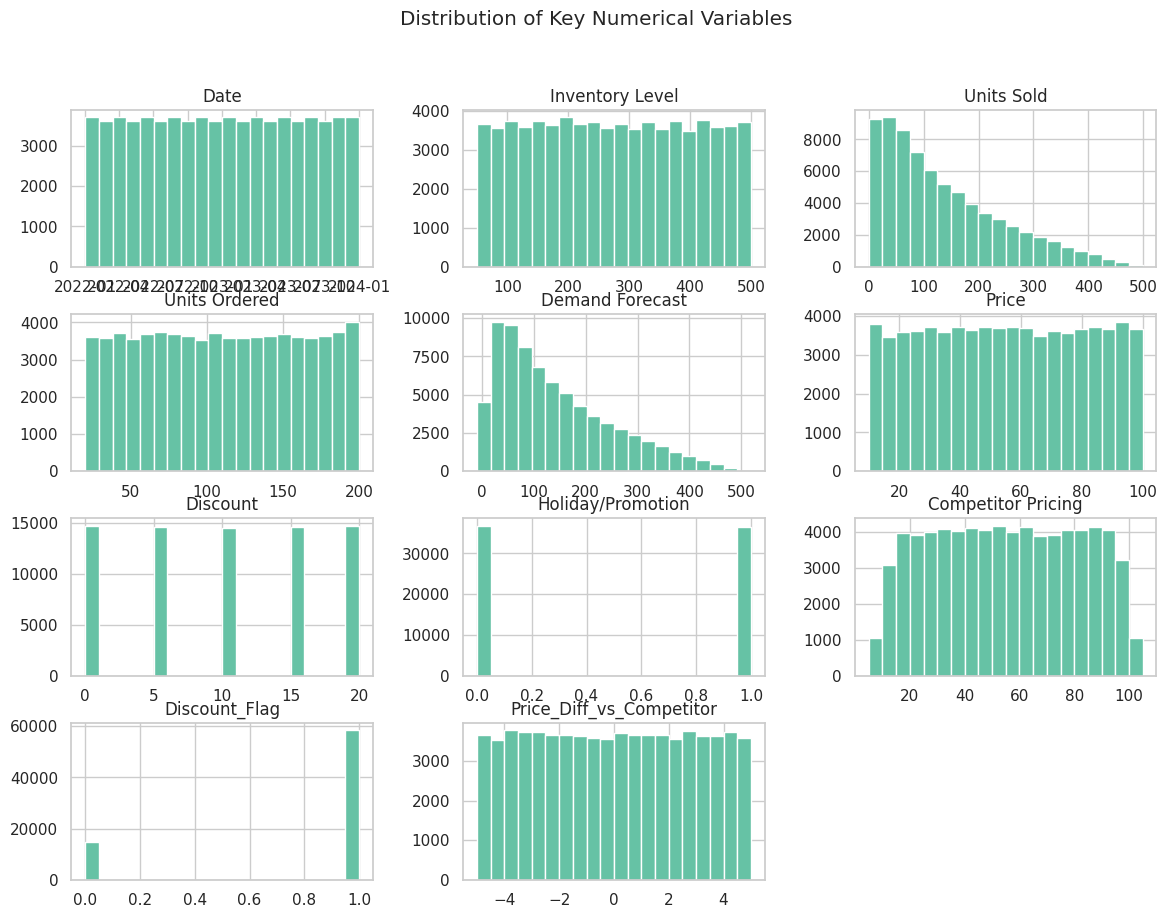

In [ ]:
sf.hist(bins=20, figsize=(14,10))
plt.suptitle("Distribution of Key Numerical Variables")
plt.show()

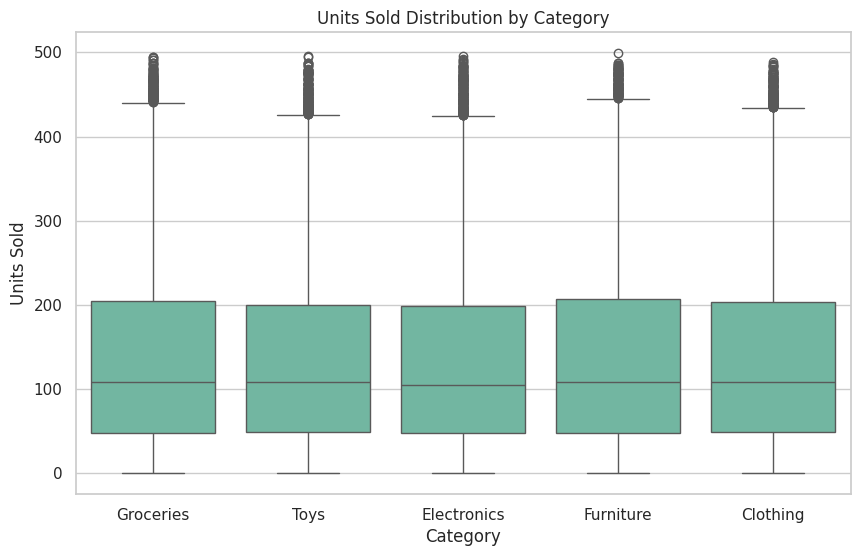

In [ ]:
sns.boxplot(data=sf, x='Category', y='Units Sold')
plt.title("Units Sold Distribution by Category")
plt.show()

Which product categories generate the highest sales volume?

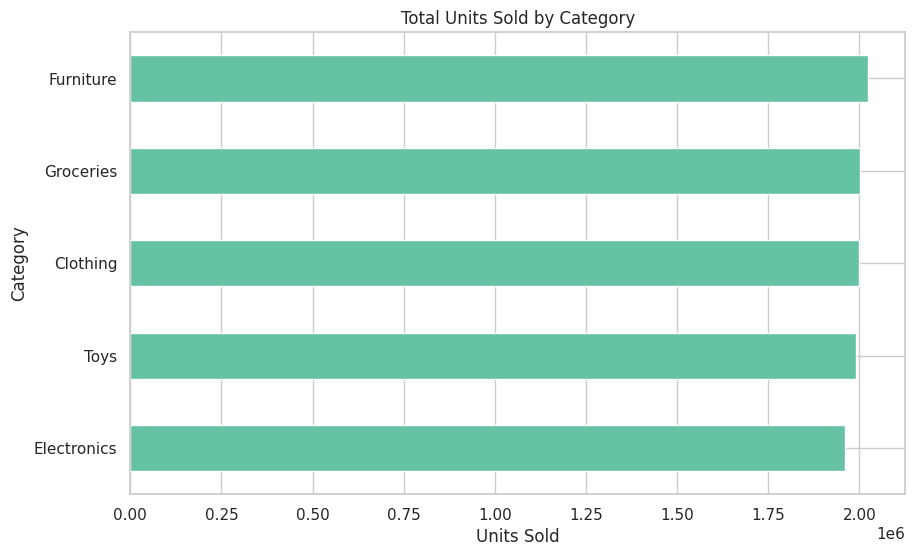

In [ ]:
category_sales = sf.groupby('Category')['Units Sold'].sum().sort_values()

category_sales.plot(kind='barh')
plt.title("Total Units Sold by Category")
plt.xlabel("Units Sold")
plt.show()


How does demand vary across regions?

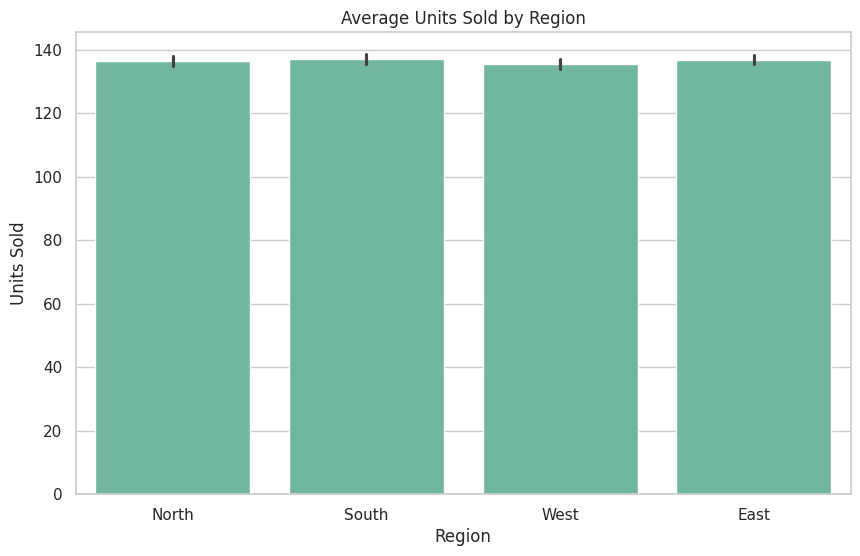

In [ ]:
sns.barplot(data=sf, x='Region', y='Units Sold', estimator=np.mean)
plt.title("Average Units Sold by Region")
plt.show()

Does seasonality influence sales performance?

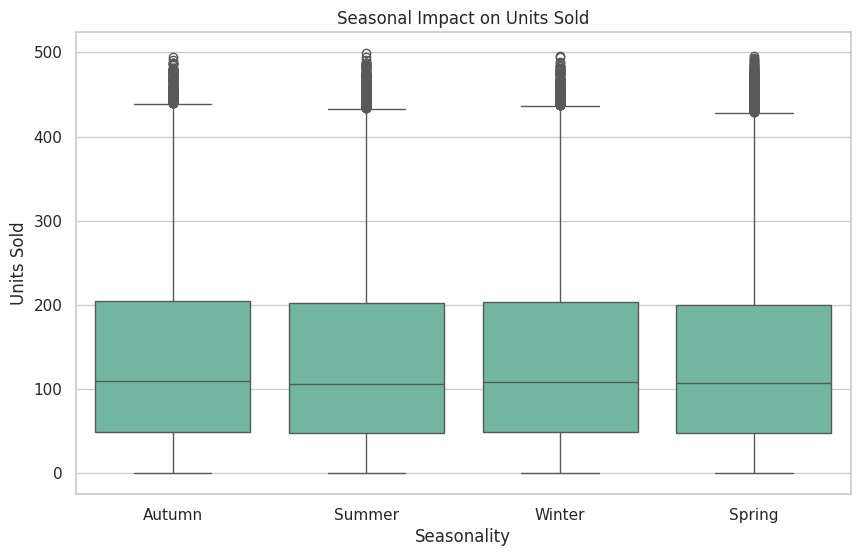

In [ ]:
sns.boxplot(data=sf, x='Seasonality', y='Units Sold')
plt.title("Seasonal Impact on Units Sold")
plt.show()

Impact of discounts on units sold

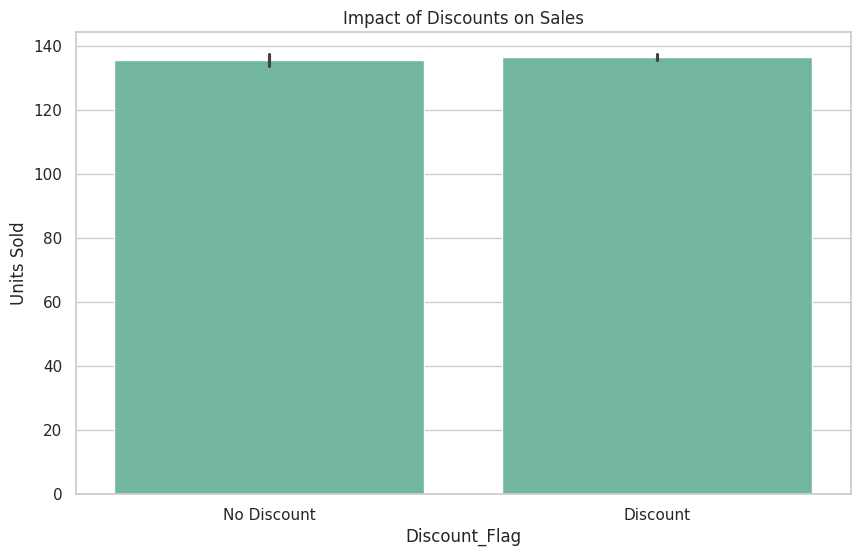

In [ ]:
sns.barplot(data=sf, x='Discount_Flag', y='Units Sold')
plt.xticks([0,1], ['No Discount','Discount'])
plt.title("Impact of Discounts on Sales")
plt.show()

Relationship between price and demand

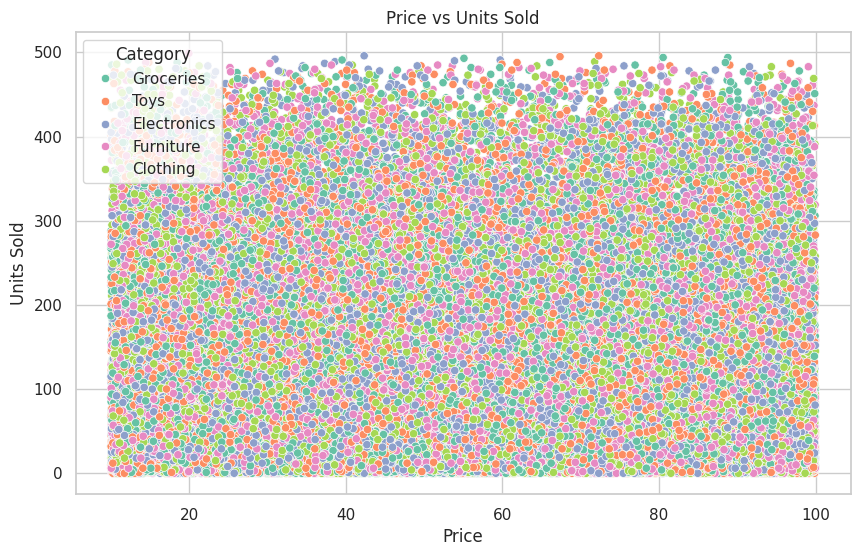

In [ ]:

sns.scatterplot(data=sf, x='Price', y='Units Sold', hue='Category')
plt.title("Price vs Units Sold")
plt.show()

Are promotions boosting demand?

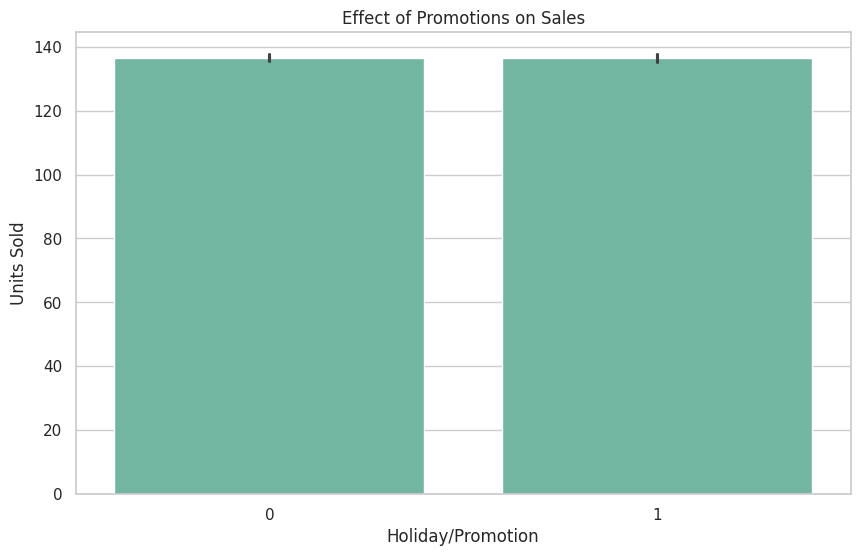

In [ ]:


sns.barplot(data=sf, x='Holiday/Promotion', y='Units Sold')
plt.title("Effect of Promotions on Sales")
plt.show()

Inventory level vs units sold

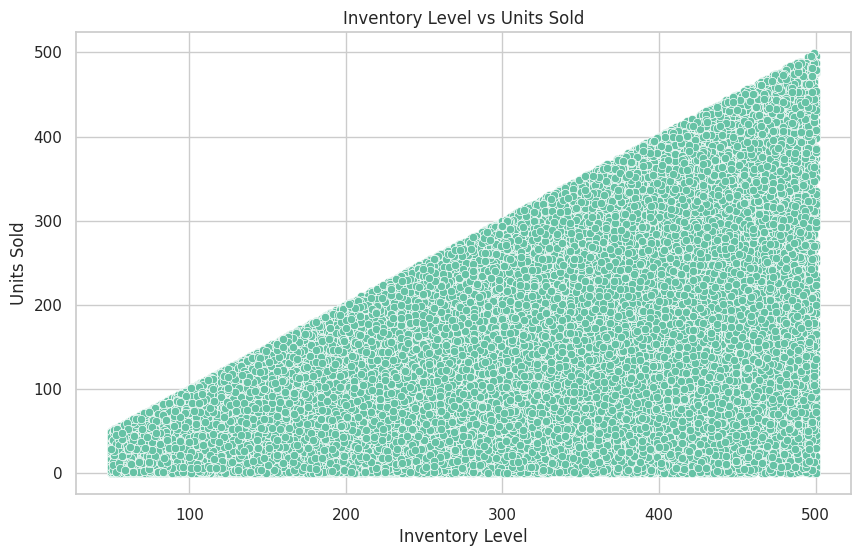

In [ ]:
sns.scatterplot(data=sf, x='Inventory Level', y='Units Sold')
plt.title("Inventory Level vs Units Sold")
plt.show()

Forecast accuracy analysis

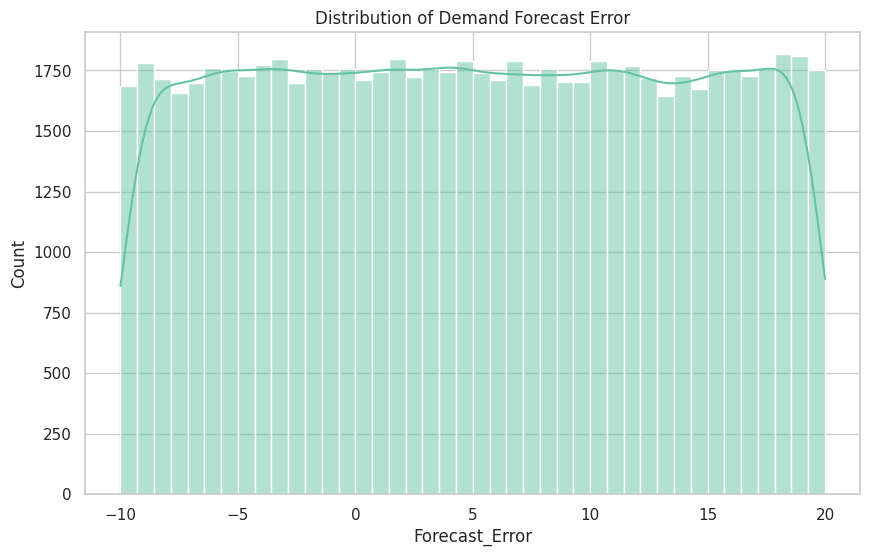

In [ ]:
sf['Forecast_Error'] = sf['Demand Forecast'] - sf['Units Sold']

sns.histplot(sf['Forecast_Error'], kde=True)
plt.title("Distribution of Demand Forecast Error")
plt.show()

Competitor pricing impact

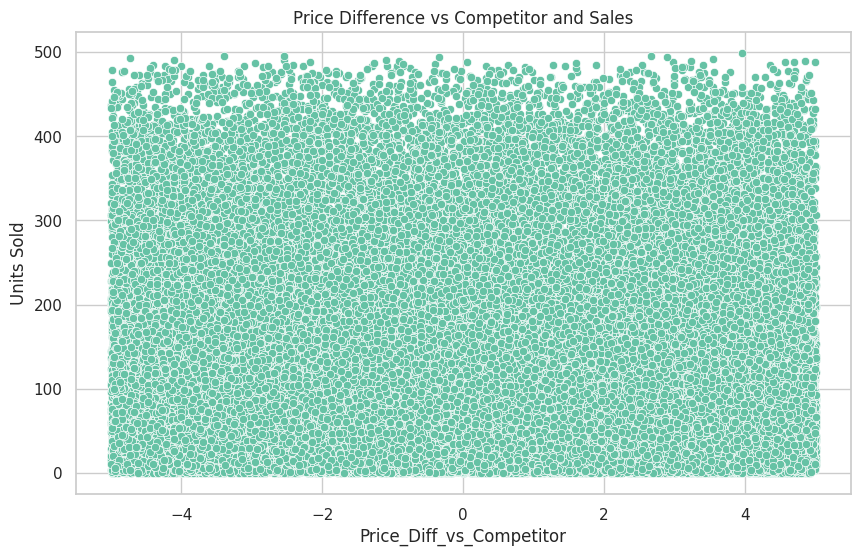

In [ ]:
sns.scatterplot(data=sf, x='Price_Diff_vs_Competitor', y='Units Sold')
plt.title("Price Difference vs Competitor and Sales")
plt.show()

Weather impact on demand

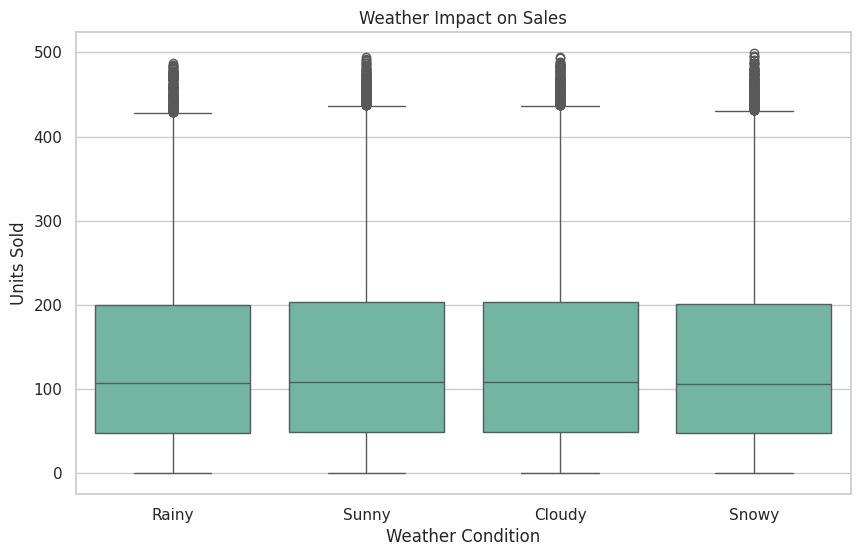

In [ ]:
sns.boxplot(data=sf, x='Weather Condition', y='Units Sold')
plt.title("Weather Impact on Sales")
plt.show()